In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", "{:,.2f}".format)
sns.set(context="notebook", style="whitegrid")

RANDOM_STATE = 42
FIGSIZE = (15, 6) 
print("Complete")

Complete


In [28]:
df = pd.read_csv(r"C:\Anaconda\dano_dataset_travel.csv", sep=";", low_memory=False)
df.head()

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,free_cancel_booking_dttm,created_dttm,cancel_dttm,book_start_dttm,local_book_start_dttm,book_end_dttm,hotel_country,hotel_city,avia_dep_city,avia_arr_city,promo_code_discount_amt,loyalty_accrual_rub_amt,nominal_price_eur_amt,nominal_price_rub_amt,order_item_cnt,month_beginning_balance_rub,monthly_income_amt,suppress_email_flg,suppress_call_flg,bounce_cd,last_sms_success_flg,call_contact_6m_flg,call_contact_3m_flg,call_contact_1m_flg,good_email_address_flg,bad_email_address_flg,email_valid_flg,children_cnt,age,age_type_cd,parent_meeting_region_nm,delivery_region_category_cd,lvn_city_nm,lvn_state_nm,time_zone_delta_tm,time_zone_cd,last_used_product_cd,first_used_product_cd,mobile_phone_operator_nm,marital_status_cd,education_level_cd,birth_place,gender_cd,last_sms_dt,last_email_send_dt,last_session_dttm
0,"1,0",209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,NaN,2024-11-01 12:39:13.457847,NaN,2024-11-05 21:15:00.000000,2024-11-05 21:15:00.000000,NaN,NaN,NaN,Ижевск,Москва,"0,0",NaN,"142,0","15018,0","1,0","9185,0","113900,0",0,0,NaN,"1,0",NaN,NaN,NaN,NaN,NaN,1,"0,0","31,0",A20,МО Северо-Восток,CIT,Г ЯРОСЛАВЛЬ,ЯРОСЛАВСКАЯ ОБЛ,03:00:00,003,MPL,MPL,Тинькофф Мобайл,NaN,NaN,ГОР ЯРОСЛАВЛЬ,M,2024-07-02,NaN,2024-11-06 19:42:52.000000
1,"1,0",2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,2019-11-21,2023-09-20,2024-04-14 20:59:00.000000,2024-04-09 21:27:01.394000,NaN,2024-04-15 00:00:00.000000,2024-04-15 00:00:00.000000,2024-04-19 00:00:00.000000,Турция,Анкара,NaN,NaN,NaN,"277,0","277,0","27751,0",NaN,"25780,0","53600,0",0,0,NaN,"1,0",NaN,NaN,NaN,NaN,NaN,1,"0,0","39,0",A20,МСК,CIT,Г КРАСНОГОРСК,МОСКОВСКАЯ ОБЛ,03:00:00,003,INV,IBN,TELE2,MAR,GRD,Р П ВЛАДИМИР 30,M,2024-06-26,NaN,2024-11-06 23:36:38.000000
2,"1,0",a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,NaN,2024-01-23 19:27:45.139941,NaN,2024-03-11 01:05:00.000000,2024-03-11 01:05:00.000000,NaN,NaN,NaN,Новосибирск,Благовещенск,"0,0","565,0","79,0","7590,0","1,0","447,0",NaN,0,0,NaN,"1,0",NaN,NaN,NaN,NaN,NaN,0,"0,0","28,0",A20,Благовещенск,CIT,Г АБАКАН,РЕСП ХАКАСИЯ,07:00:00,007,MPL,MPL,Скартел,UNM,GRD,ГОРОД АБАКАН РЕСПУБЛИКИ ХАКАСИЯ,M,2024-07-15,NaN,2024-11-06 11:30:31.000000
3,"1,0",9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,2023-12-18,2023-12-18,NaN,2024-10-19 09:58:20.264000,NaN,2024-10-19 00:00:00.000000,2024-10-19 00:00:00.000000,2024-10-20 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,"73,0","7705,0",NaN,"12549,0","234500,0",0,0,NaN,"1,0",NaN,NaN,NaN,NaN,NaN,1,"0,0","61,0",A60,МСК,CIT,NaN,Г МОСКВА,03:00:00,003,MPL,MPL,Билайн,NaN,NaN,Г СТОКГОЛЬМ ШВЕЦИЯ,M,2024-06-25,NaN,2024-11-06 15:33:18.000000
4,"1,0",3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,2019-02-18,2019-02-18,NaN,2024-02-06 11:50:47.558707,NaN,2024-02-07 06:00:00.000000,2024-02-07 06:00:00.000000,NaN,NaN,NaN,Сочи (Адлер),Москва,"0,0","584,0","85,0","8352,0","1,0","6023,0","703500,0",0,0,NaN,"1,0",NaN,NaN,NaN,"1,0","0,0",1,"0,0","36,0",A20,Москва Центр Хамовники,CIT,NaN,Г МОСКВА,03:00:00,003,MPL,MPL,МегаФон,MAR,GRD,ГОР. МОСКВА,M,2024-07-15,2012-04-19,2024-11-06 23:42:28.000000


In [29]:
df.info()
na = df.isna().sum().sort_values(ascending=False)
na.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_online_payment_flg     786885 non-null  object 
 1   account_rk                   835938 non-null  object 
 2   client_rk                    835938 non-null  object 
 3   order_rk                     835938 non-null  object 
 4   loyalty_program_type_nm      754957 non-null  object 
 5   bundle_nm                    588049 non-null  object 
 6   order_type_cd                786885 non-null  object 
 7   order_status_cd              779514 non-null  object 
 8   party_first_order_dt         786885 non-null  object 
 9   party_first_order_type_dt    786767 non-null  object 
 10  free_cancel_booking_dttm     75600 non-null   object 
 11  created_dttm                 786885 non-null  object 
 12  cancel_dttm                  0 non-null       float64
 13 

cancel_dttm                 835938
call_contact_1m_flg         835667
call_contact_3m_flg         835667
call_contact_6m_flg         835667
good_email_address_flg      816140
bad_email_address_flg       816140
last_email_send_dt          816140
bounce_cd                   796263
free_cancel_booking_dttm    760338
hotel_country               673690
hotel_city                  673690
book_end_dttm               664390
education_level_cd          360834
loyalty_accrual_rub_amt     360585
lvn_city_nm                 359969
dtype: int64

In [30]:
df_hotels = df[df["order_type_cd"] == "HOT"].copy()
df_hotels.shape

(171548, 56)

In [31]:
def to_num(s: pd.Series) -> pd.Series:
    
    s = (
        s.astype(str)
         .str.replace("\u00A0", "", regex=False)   
         .str.replace(" ", "", regex=False)        
         .str.replace(",", ".", regex=False)       
         .str.replace(r"[^0-9.\-]", "", regex=True)  
         .replace({"": np.nan, ".": np.nan, "-": np.nan})
    )
    return pd.to_numeric(s, errors="coerce")

def clip_by_quantile(s: pd.Series, q: float=0.99) -> pd.Series:
   
    thr = s.quantile(q)
    return s.where(s <= thr)

def savefig(path: str):
   
    plt.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.show()

In [34]:
num_cols_raw = [
    "nominal_price_rub_amt", "nominal_price_eur_amt",
    "monthly_income_amt", "age",
    "promo_code_discount_amt", "loyalty_accrual_rub_amt"
]


for c in num_cols_raw:
    if c in df_hotels.columns:
        df_hotels[c] = to_num(df_hotels[c])


if "nominal_price_eur_amt" in df_hotels.columns:
    df_hotels["nominal_price_eur_amt"] = df_hotels["nominal_price_eur_amt"] * 100

df_hotels["price_amt"] = df_hotels["nominal_price_rub_amt"].fillna(df_hotels["nominal_price_eur_amt"])


df_hotels["promo_used"] = df_hotels["promo_code_discount_amt"].fillna(0).gt(0)


df_hotels[["nominal_price_rub_amt", "nominal_price_eur_amt", "price_amt"]].head(10)
df_hotels[["price_amt", "monthly_income_amt", "age", "promo_used"]].describe(include="all")

,price_amt,monthly_income_amt,age,promo_used
count,"171,548.00","140,018.00","171,548.00",171548
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,170985
mean,"11,968.65","157,739.58",37.39,NaN
std,"23,742.09","260,374.06",8.87,NaN
min,1.00,0.00,14.00,NaN
25%,"3,015.00","60,300.00",31.00,NaN
50%,"5,631.50","100,500.00",36.00,NaN
75%,"12,437.25","184,250.00",42.00,NaN


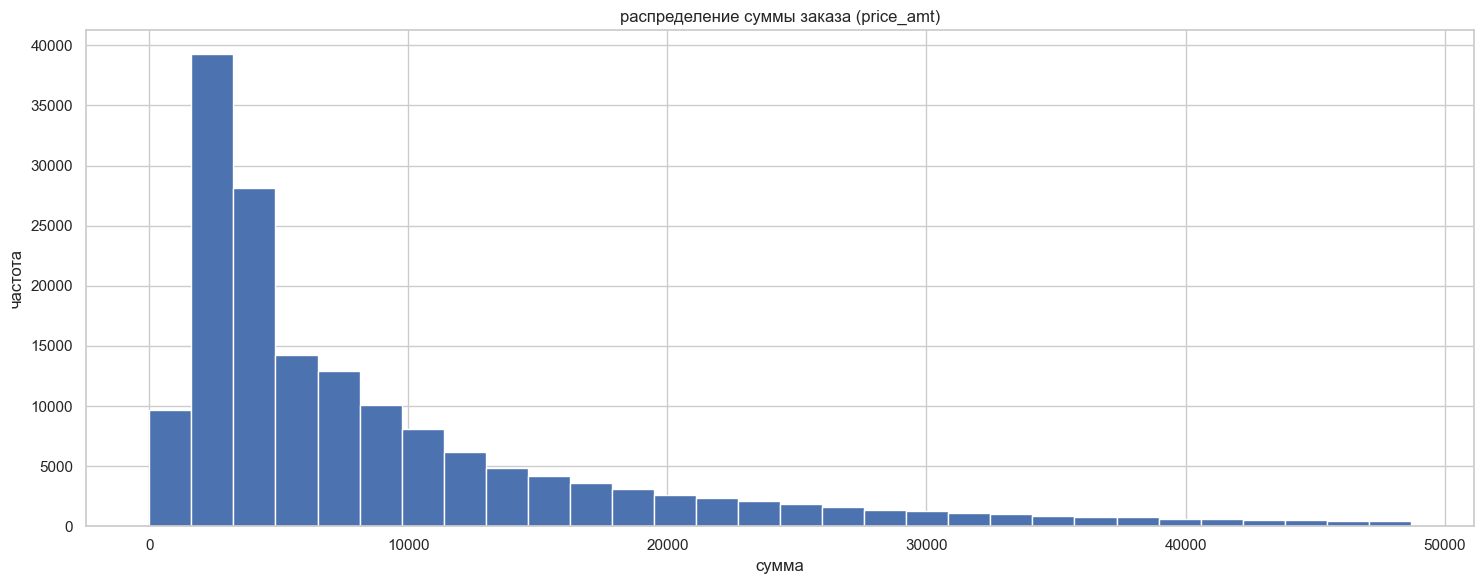

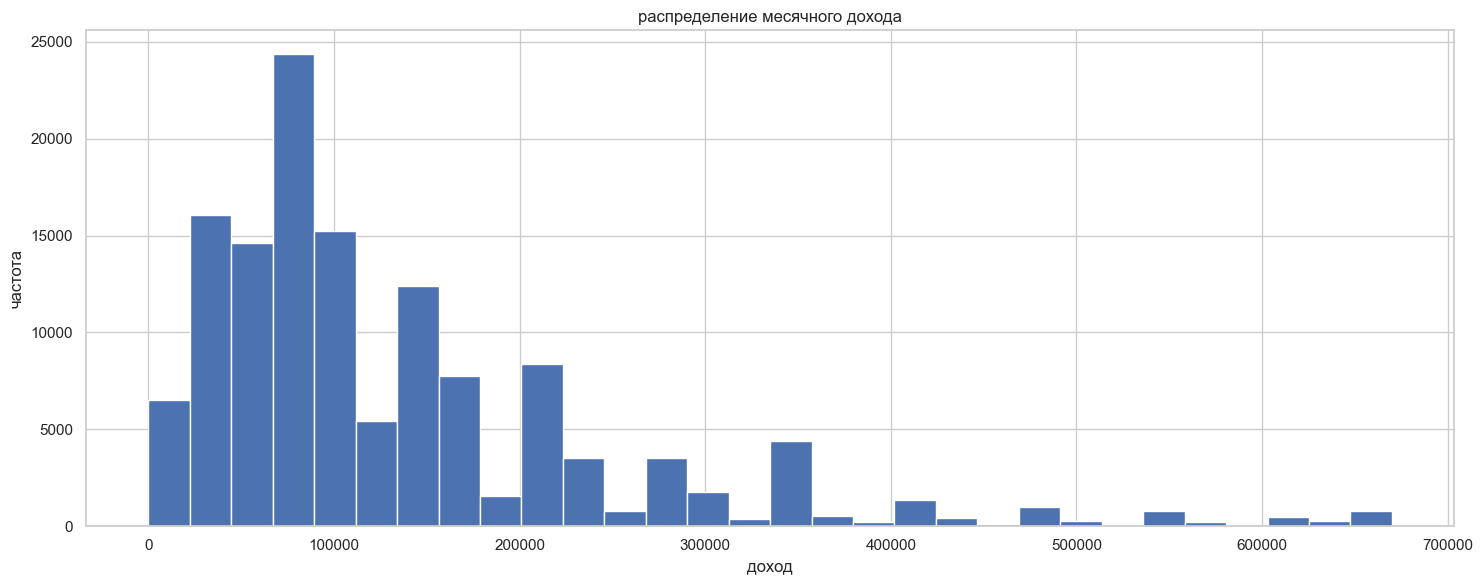

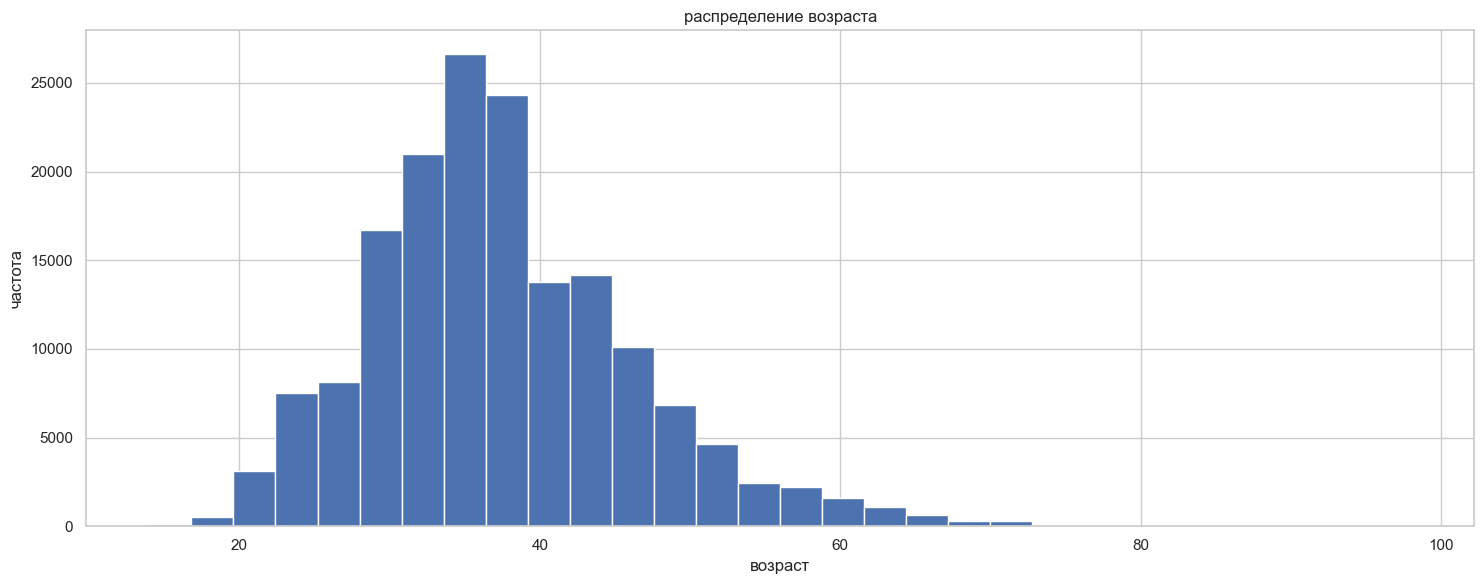

In [41]:
f_plot = df_hotels.copy()
df_plot["price_amt"] = clip_by_quantile(df_plot["price_amt"], q=0.99)
df_plot["monthly_income_amt"] = clip_by_quantile(df_plot["monthly_income_amt"], q=0.99)


ax = df_plot["price_amt"].dropna().hist(bins=30, figsize=FIGSIZE)
plt.title("распределение суммы заказа (price_amt)"); plt.xlabel("сумма"); plt.ylabel("частота")
savefig("slide_hist_price.png")

ax = df_plot["monthly_income_amt"].dropna().hist(bins=30, figsize=FIGSIZE)
plt.title("распределение месячного дохода"); plt.xlabel("доход"); plt.ylabel("частота")
savefig("slide_hist_income.png")

ax = df_plot["age"].dropna().hist(bins=30, figsize=FIGSIZE)
plt.title("распределение возраста"); plt.xlabel("возраст"); plt.ylabel("частота")
savefig("slide_hist_age.png")

In [36]:
df_plot = df_plot.dropna(subset=["price_amt"]).copy()


np.random.seed(42)
df_plot["group"] = np.random.choice(["A_control", "B_test"], size=len(df_plot))


median_price = df_plot["price_amt"].median()


df_plot.loc[(df_plot["group"] == "B_test") & (df_plot["price_amt"] > median_price), "price_amt"] *= 1.1


result = df_plot.groupby("group")["price_amt"].agg(["count", "mean", "median"]).round(2)
print(result)

           count     mean   median
group                             
A_control  83145 9,160.87 5,367.00
B_test     83306 9,932.50 5,381.00


In [39]:
from scipy.stats import mannwhitneyu

a = df_plot.loc[df_plot["group"] == "A_control", "price_amt"]
b = df_plot.loc[df_plot["group"] == "B_test", "price_amt"]

u_stat, p_val = mannwhitneyu(a, b, alternative="two-sided")
print(f"Mann–Whitney U p-value: {p_val}")

Mann–Whitney U p-value: 2.699744221217193e-20


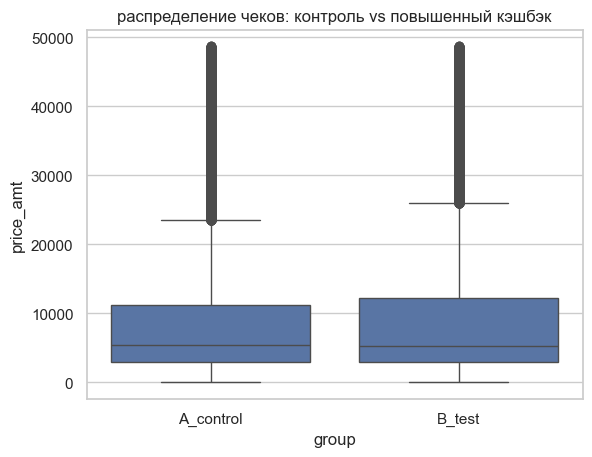

In [42]:
sns.boxplot(x="group", y="price_amt", data=df_plot)
plt.title("распределение чеков: контроль vs повышенный кэшбэк")
plt.show()

             Город  Количество бронирований
0           Москва                    22624
1  Санкт-Петербург                    13881
2              nan                     9300
3             Сочи                     6098
4           Казань                     3675
5          Стамбул                     3379


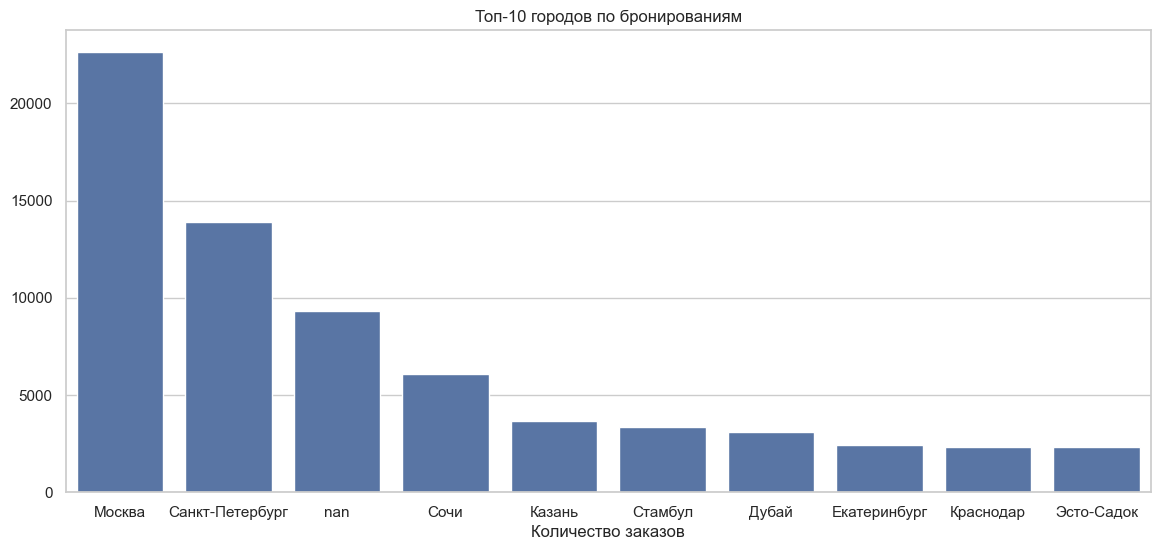

In [63]:
top_cities = (
    df_hotels
      .assign(hotel_city=df_hotels['hotel_city'].astype(str).str.strip())
      .groupby('hotel_city', dropna=False)
      .size()
      .nlargest(10)
      .reset_index(name='Количество бронирований')
      .rename(columns={'hotel_city': 'Город'})
)
print(top_cities.head(6))
plt.figure(figsize=(14,6))
sns.barplot(data=top_cities, y='Количество бронирований', x='Город')
plt.title('Топ-10 городов по бронированиям')
plt.xlabel('Количество заказов'); plt.ylabel('')
plt.show()

    Страна  Количество бронирований
0   Россия                   120729
1      nan                     9300
2   Турция                     7511
3  Таиланд                     5611
4      ОАЭ                     3903
5   Италия                     2002


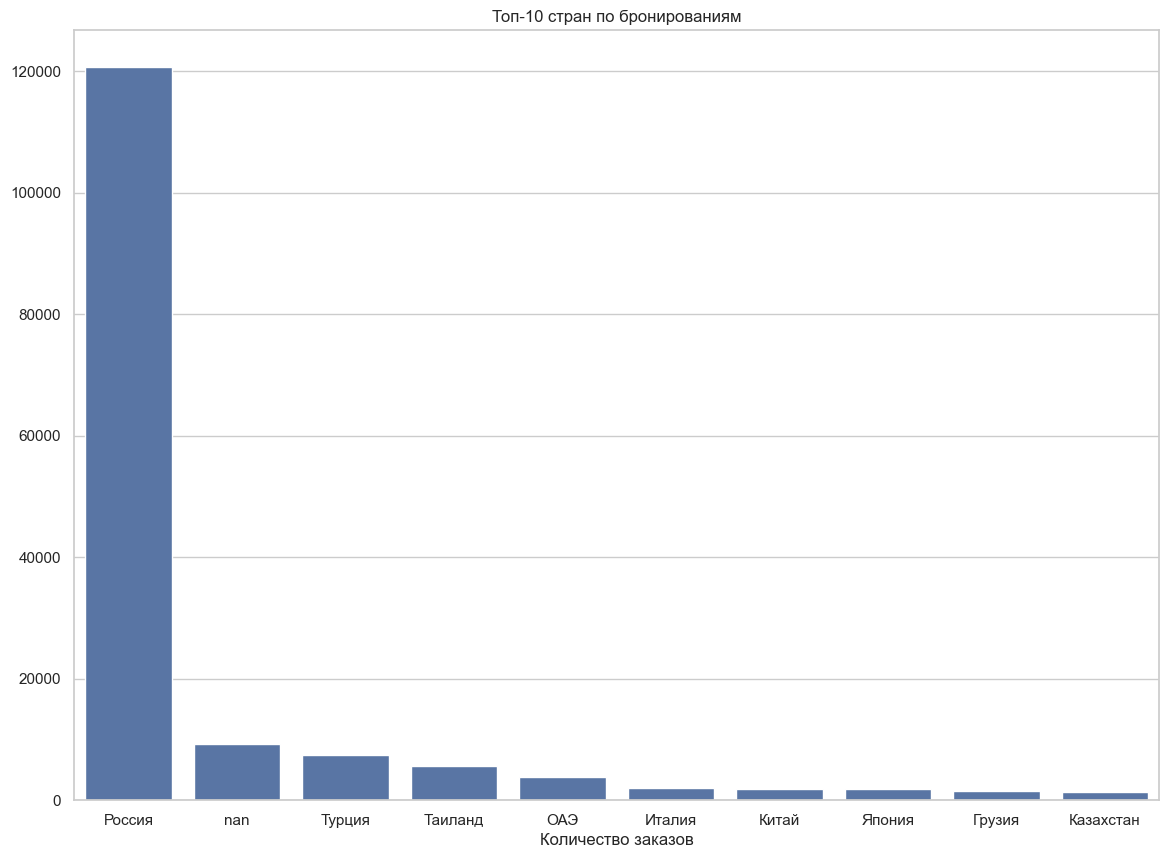

In [64]:
top_countries = (
    df_hotels
      .assign(hotel_country=df_hotels['hotel_country'].astype(str).str.strip())
      .groupby('hotel_country', dropna=False)
      .size()
      .nlargest(10)
      .reset_index(name='Количество бронирований')
      .rename(columns={'hotel_country': 'Страна'})
)

print(top_countries.head(6))
plt.figure(figsize=(14,10))
sns.barplot(data=top_countries, y='Количество бронирований', x='Страна')
plt.title('Топ-10 стран по бронированиям')
plt.xlabel('Количество заказов'); plt.ylabel('')
plt.show()

In [72]:

mean_price = df_plot["monthly_income_amt"].mean()
median_price = df_plot["age"].median()

print(f"Средняя зп: {mean_price:,.0f}")


Средняя зп: 133,079
